In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target
print(X.shape)

(506, 13)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape)

(339, 13)


In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
clf = SGDRegressor()
clf.fit(X_train, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))

22.07902900680206


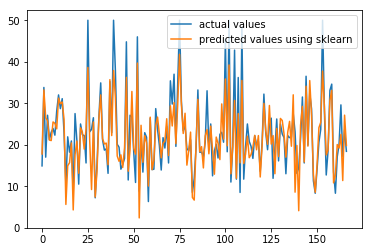

In [7]:
import matplotlib.pyplot as plt

Y_predict = clf.predict(X_test)
plt.plot(y_test, label='actual values')
plt.plot(Y_predict, label='predicted values using sklearn')
plt.legend()
plt.show()

In [8]:
weights = clf.coef_
print(weights)

[-0.79609397  0.69647881 -0.2513956   1.20727449 -0.50207957  2.67095455
 -0.05768521 -2.02017412  0.62434244 -0.28510613 -1.678153    1.01031105
 -3.85589441]


In [114]:
#applying Stochastic gradient descent on Boston data set 

#find the number of points and features in dataset
n_features= X_train.shape[1]
n_samples = X_train.shape[0]
n_epoch = 150
l_rate = 0.01
mse =[]

#generate a random hyperplane
w = [np.random.random() for _ in range(n_features)]
b= np.random.random()
print(w)  #initial coeffiecients



lst =[]
for epoch in range(n_epoch):
    #if epoch%2 == 0:
    l_rate = l_rate/2
    sq_error = 0.0
    for sample in range(n_samples):
        x = X_train[sample]
        
        coef_feature = 0.0
        for i in range(n_features):
            coef_feature += x[i]*w[i]
        
        y_bar = b + coef_feature
        error = y_bar - y_train[sample]
        sq_error += error*error
        
       # print(error)
        b = b - (l_rate * error)
    
       
       
        for i in range(n_features):
            w[i] = w[i] - (l_rate * error * x[i])
            
        lst.append(sq_error/n_samples)

Y = []
for i in range(X_test.shape[0]):
    Y.append(0)
for i in range(X_test.shape[0]):
    Y[i] = b
    for j in range(X_test.shape[1]):
        Y[i] += w[j]*X_test[i][j]

print(Y)
  



[0.45589087822800933, 0.09344945541151273, 0.5644506102934226, 0.024337256383373584, 0.8140741534839618, 0.1045422685520504, 0.04434594798524427, 0.7072610463223774, 0.9947768553512627, 0.44853304590407705, 0.9905367759355697, 0.9853445879770858, 0.7493754531481854]
[20.606725643274537, 23.93102774264399, 29.995312305273515, 23.792408272696502, 24.84009409726191, 22.336587197387683, 18.997472232102048, 12.637872531785213, 16.416970015657167, 24.20635471836086, 19.4678267190297, 11.598072841366829, 26.325314486759144, 18.792804958027766, 8.338978636663605, 8.571360231693363, 24.31562666880862, 16.20424056809553, 27.46249505720239, 29.893903428612184, 23.99999107704876, 10.948759060474277, 18.54294344677134, 20.806475271638188, 34.2559089637981, 24.558847925217417, 22.454889182264797, 19.61703575548735, 21.652026222105704, 13.902673617331873, 31.49285360580518, 28.896731579649593, 22.509282510028427, 35.61649075954783, 19.298069031515805, 15.124681593975506, 22.353464317004526, 24.134128

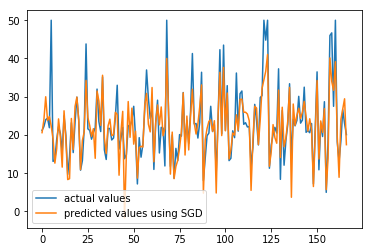

In [115]:

plt.plot(y_test, label='actual values')
plt.plot(Y, label='predicted values using SGD') #predicted values
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

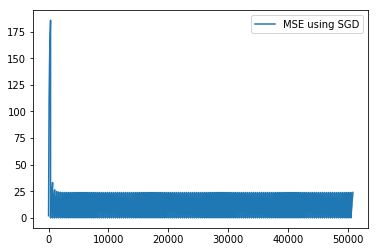

In [116]:
plt.plot(lst, label='MSE using SGD')
plt.legend()
plt.show

In [117]:
print('Weights obtained from SGD',w)

Weights obtained from SGD [-0.7294322347402055, 0.5573431187053765, -0.22561171061634683, 0.9777226895934494, -0.6388807553496705, 2.972755382225996, -0.008740850447775334, -1.459015324590147, 0.8482481436437751, -0.6808767811919878, -1.8578736116873755, 0.8189158312413782, -3.616400898590031]


In [118]:
print('The mean squared error from SGD', lst[-1])


The mean squared error from SGD 23.896752253875324
